# Machine Learning & Statistics
## Tasks 2020

### Question 1
***
**Calculating the Square Root of 2 to 100 decimal places**

Initial code to calculate square root adapted from (perigon, 2017), in the link it is discussed that calculating square root can be done by raising the number to perform square root on by a power of 0.5. This has given me the start of a function to calculate the square root of 2 however further work is needed to increase decimals to 100 places.

Further research brought me to a Stack Overflow discussion (SYK, 2015) that used format to increase the precision of a floating number which I have adapted and used to display 100 decimal places. The only issue is what looks like after around 50/60 places I am getting recurring 0's which is obviously not correct.

After additional investigation in the Python Documentation (Python Software Foundation, 2020), it appears that there is a limitation as to what precision of numbers can be stored on computers when mapping python floats when it comes to arithmetic. Python floats are mapped to IEEE-754 “double precision” which contain 53 bits of precision which aligns with the number of decimals I am currently displaying.

Further reading in the python documentation revealed integers can be much longer that floats so I am trying to leverage that fact by converting the square root of 2 to an integer ratio and multiplying this up to give an int of required length to convert back to a decimal (Python Software Foundation, 2020).

After further check it looks like the calculation however is not giving the correct answer to the square root of 2, this falls back to the same issue as original calculation is done using floats (Python Software Foundation, 2020) which are limited in their precision.

Additional research online brought me to a website describing calculating standard deviation of an integer which I will be using to calculate square root of $2x10^{200}$ (to allow for required length of decimals) code adapted using (D'Aprano, 2011). This algorithm was come accross by reading on Wikipedia into integer square root so that I could take advantage of large number of charaters stored as integers (Wikipedia, 2020).

In [1]:
def sqrt2(x):
    # Converts number (x) to int to allow square root calculation by integer
    n = int(x)
    
    # a set to number of bits necessary to represent an integer in binary
    # b set to 2
    # divmod takes a two number a and b and returns a tuple consisting of their quotient and remainder.
    # This will be used to increase power of 2 by the quotient + remainder
    a, b = divmod(n.bit_length(), 2)
    
    # x set to 2 to the power of a+b
    x = 2**(a+b)
    while True:
        # Floor division done to avoid creating float type
        # repeat until y >= x
        y = (x + n//x)//2
        if y >= x:
            return x
        x = y


twoExponent = 2*(10**200)
answer = sqrt2(twoExponent)

In [2]:
# Convert answer to string to check precision of calculation
p_check = str(answer)

# Type of len check change to str to allow printing, -1 in check acounts for 
# decimal point character
print("Function is calculating to "+str(len(p_check)-1)+" decimal places.")

#print(type(p_check))

print(f'{answer // 10**100}.{answer % 10**100:0100d}')

sqrtEoin = f'{answer // 10**100}.{answer % 10**100:0100d}'

Function is calculating to 100 decimal places.
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


Below is used to format output of algorithm to correctly show square root of 2 rather than an exponent of it adapted from (Robᵩ, 2017), first block floor divided by $10^{100}$ to capture the integer portion of the calculation, second part capture remainder of division by $10^{100}$ by using the modulo function which captures the remainder and placed to the right of the decimal.

The Square root of 2 to 100 decimals for comparison taken from (Nemiroff & Bonnell , Unknown) where was found to be: 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

Comparison was done below with my calculation saved as "sqrtEoin" and the answer as compied from (Nemiroff & Bonnell , Unknown) saved as "sqrtNasa" and is returning as True indicating they are the same.

In [3]:
sqrtNasa = "1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"

# Comparison check
sqrtNasa == sqrtEoin

True

### Answer Output to Question 1
***

In [4]:
print("The Square Root of 2 to 100 decimals = "+f'{answer // 10**100}.{answer % 10**100:0100d}')

The Square Root of 2 to 100 decimals = 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


### Question 2
***
**Validating Chi-squared test result from Wikipedia Article**

#### Import Packages
Scipy.Stats used to calculate chi-sqaured value as detailed in assignment, Numpy will be used to store lists in multi-dimensional array.

In [5]:
import scipy.stats as stats
import numpy as np

Below code aligns Tables to left of markdown cells adapted from(Trani, 2016).

In [6]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

The observations as recorded on the Wikipedia page (Wikipedia Contributors, 2020) provided in the Tasks brief can be seen in the below table and were stored in three lists as coded below (obsWhite, obsBlue, obsNon). The goal of this Task is to verify the chi-squared result stated on the Wikipedia page of **24.6**.

The code to conduct the chi-squared test was adapted from (Hunneycutt, 2018) where the author was using chi-squared test to determine if four samples of dice rolls they conducted to show whether the dice rolls were fair, i.e. each result or category in our case has an equal chance of presenting.

**Dataset as seen on Wikipedia**

||A|B|C|D|Total|
|:---|:---:|:---:|:---:|:---:|:---:|
|White Collar|90|60|104|95|**349**|
|Blue Collar|30|50|51|20|**151**|
|No Collar|30|40|45|35|**150**|
|**Total**|**150**|**150**|**200**|**150**|**650**|

In [7]:
#Observations from Wikipedia stored in 3 Lists
obsWhite = [90, 60, 104, 95]
obsBlue = [30, 50, 51, 20]
obsNon = [30, 40, 45, 35]

# Observation Lists
obs = np.array([obsWhite, obsBlue, obsNon])

### Answer Output to Question 2
***

In [8]:
# Below Formats output of Chi-Squared Test in more readable format
# This is done by asigning a variable name to each ouput to allow formatting of prints
chi2_stat, p_val, dof, ex = stats.chi2_contingency(obs)

print("===Chi-Squared Stat===")
print(f"{chi2_stat:.1f}")
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi-Squared Stat===
24.6


===Degrees of Freedom===
6


===P-Value===
0.0004098425861096696


===Contingency Table===
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


The output contingency table above was then used to manually calculate the Chi-Squared Test using the formula: $\dfrac{(observed - expected)^2}{expected}$ or in the example of White Collar in A $\dfrac{(90 - 80.54)^2}{80.54}$ and tabulated in the below table rounding all values to two decimal places which aligns with the answer of 24.6 in the task details and calculation from (Wikipedia Contributors, 2020). 

**Manual Chi-Square Test Calculation**

||A|B|C|D|Total|
|:---|:---:|:---:|:---:|:---:|:---:|
|White Collar|1.11|5.24|0.11|2.60|**9.06**|
|Blue Collar|0.67|6.59|0.44|6.33|**14.03**|
|No Collar|0.62|0.84|0.03|0.00|**2.98**|
|**Total**|**2.4**|**12.67**|**0.58**|**8.93**|**24.58**|

### Question 3
***
**Standard Deviations of an Array**

In Microsoft's spreadsheet software (excel) the standard deviation can be calculated using several different functions, below I will discuss two of those functions comparing and contrasting them. Following which I will simulate these calculations using Numpy to demonstrate how **STDEV.S** is a better function at estimating standard deviation of a population when performed on a sample.

**STDEV.P**
<br>
The STDEV.P function in excel is used to calculate standard deviation for an entire population (Laerd Statistics, 2018), meaning that we have the entire dataset we are interested in which in general is not the case. For example if a teacher wished to summarise the results of an exam completed by their students they would use STDEV.P as they are only interested in their pupils scores and no others are in scope.

**STDEV.S**
<br>
In contrast the STDE.S function used in excel calculates the standard deviation for a sample of data taken from a population which provides an estimation of the entire populations standard deviation (Laerd Statistics, 2018). For example if a researcher recruited several males aged between 45 and 60 years old to study genetic markers for a particular disease they would use STDEV.S. This is because the researcher did not recruit the entire population of 45-60 year old males for the study rather a representative sample of the population which can be used to make an extimation of the entire population.

**Calculation Differences**
<br>
Both of these functions are calculating variability in the data however there is a distinction in calculting each in that STDEV.P is a parameter and so a fixed value calculated using all items within the dataset. Whereas, STDEV.S is a statistic as it is calculated from a sample of the population and so the result is dependant on the sample provided which causes greater variability resulting in the result being larger than the result from STDEV.P (Taylor, 2020).

**Simulation**
<br>
The below code will be used to generate a random array of 10,000 numbers centered around 0 with a Standard Deviation of 0.25 to be used to compare the calculation results of the STDEV.P and STDEV.S functions of the entire population and a random sample from that population.

In [9]:
# Import Packages
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
# Function replicating STDEV.P
def stdev_p(x):
    return np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

# Function replicating STDEV.S
def stdev_s(x):
    return np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))

In [11]:
# Set Seed
np.random.seed(13245)

# Creates Random Array of 100,000 numbers centered
# around 0 with standard deviation of 2.5
population = np.random.normal(0, 2.5, 100000)

# Shuffles Population Dataset to remove bias
np.random.shuffle(population)

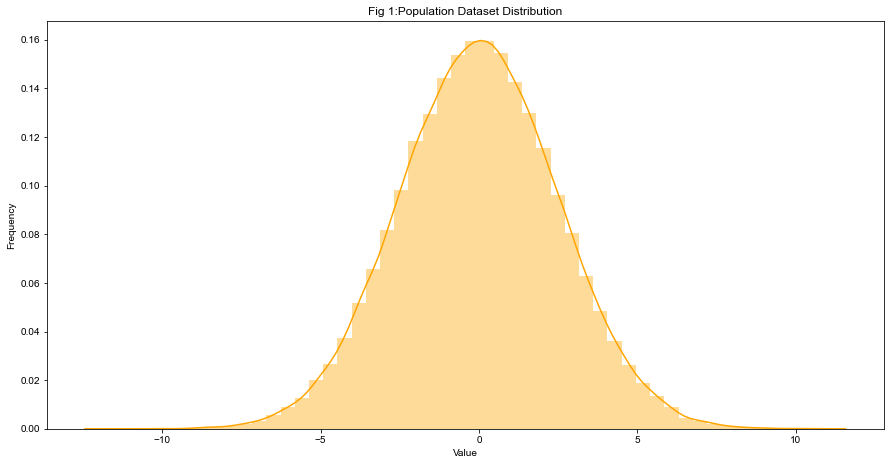

In [12]:
# Visualise Population Distribution

plt.rcParams["figure.figsize"] = (15,7.5)

sns.distplot(population, color='orange')
sns.set_style("darkgrid")
plt.title('Fig 1:Population Dataset Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
# STDEV.P on Entire Population
stdev_p(population)

2.5002370722499916

In [14]:
## STDEV.S on Entire Population
stdev_s(population)

2.5002495735291124

As can be seen from the above outputs of the STDEV.P and STDEV.S functions on the entire population of random numbers, both functions correctly calculated the standard deviation with a very small difference as expected with the STDEV.S function returning a larger Standard Deviation.

In [15]:
# Take Random Sample of 50 numbers from population 
sample = np.random.choice(population, 50)

# Shuffles Sample Dataset to remove bias
np.random.shuffle(sample)

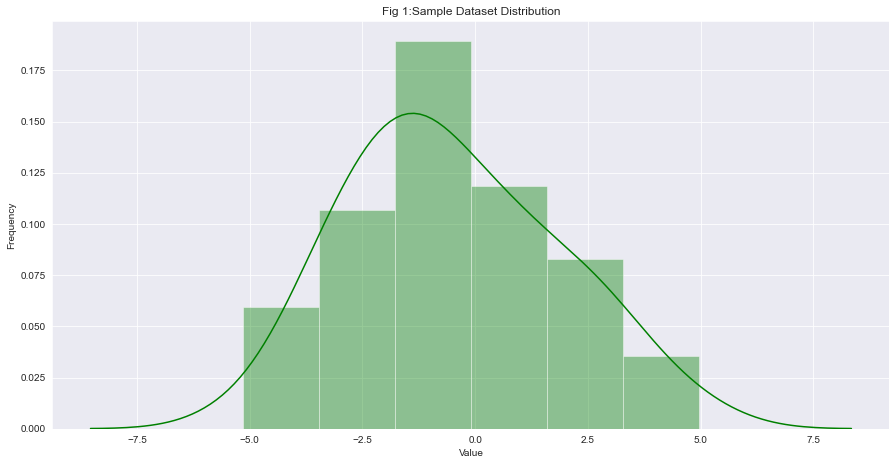

In [16]:
# Visualise Population Distribution

plt.rcParams["figure.figsize"] = (15,7.5)

sns.distplot(sample, color='green')
sns.set_style("darkgrid")
plt.title('Fig 1:Sample Dataset Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Answer Output to Question 3
***

In [17]:
# STDEV.P on Sample
print(f'STDEV.P Result: {stdev_p(sample)}')
print(f'\nSTDEV.P Calculation Accuracy: {(stdev_p(sample)/2.5)*100:0.2f}%')

STDEV.P Result: 2.30063660180207

STDEV.P Calculation Accuracy: 92.03%


In [18]:
# STDEV.S on Sample
print(f'STDEV.S Result: {stdev_s(sample)}')
print(f'\nSTDEV.S Calculation Accuracy: {(stdev_s(sample)/2.5)*100:0.2f}%')

STDEV.S Result: 2.3239939174003124

STDEV.S Calculation Accuracy: 92.96%


As can be seen from the above outputs of the STDEV.P and STDEV.S functions on a random sample of 50 numbers from the earlier generated population of 100,000, the STDEV.S function calculated closer to the true Standard Deviation of 2.5 with a result of **2.323993917400312** and Calculation Accuracy of **92.96%** on this particular run of the workbook.

Whereas the STDEV.P function returned a result of **2.30063660180207** giving a calculation accuracy compared with the true Standard Deviation of 2.5 of **92.03%**.

This simulation proves that the STDEV.S function is more accurate at calculating Standard Deviation on a sample of a population giving a better estimation of the true Standard Deviation when compared with STDEV.P.

Further expanding on the difference between Sample Standard Deviation and Population Standard Deviation, the reason that we divide by n-1 rather than n is all to do with bias. Using n-1 emsure that in the long run the calculation is unbiased in that no matter how many samples we take the average of s² is always equal to σ². Whereas if we used n σ² would generally be underestimated while if we subtracted a larger number from n the calculation would be generally overestimating (Khan, 2012).


### Question 4
***
**<i>k</i>-Means Clustering Iris Dataset**

In [19]:
# Used to store Iris Data as DataFrame
import pandas as pd

In [20]:
# Read Dataset into Dataframe
iris = pd.read_csv("Resources/iris.csv")

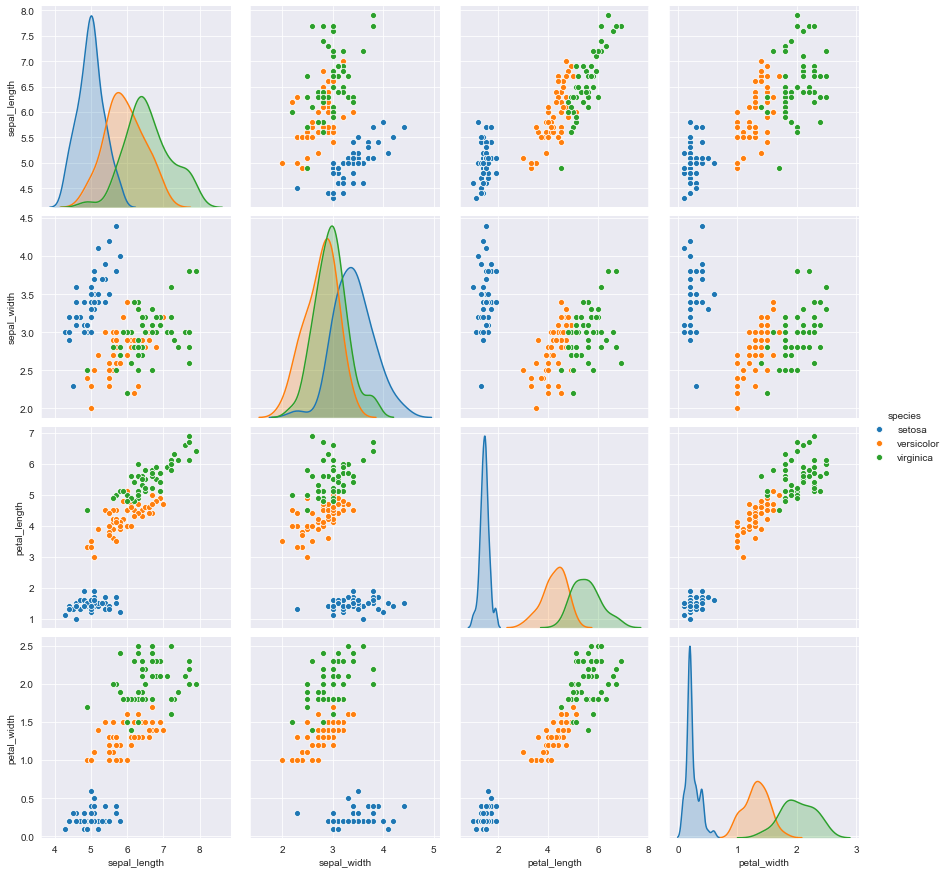

In [21]:
# Colour data by species to find relationships
sns.pairplot(iris, height=3, hue='species')

From looking at the above pairplot it looks like the variables which gives the greatest seperation accorss the different species of isis is the Petal Legth and Petal Width plot (Plotted Seperately below). For this reason I will begin my K-Means analysis using these variables and then do some testing to the accuracy.

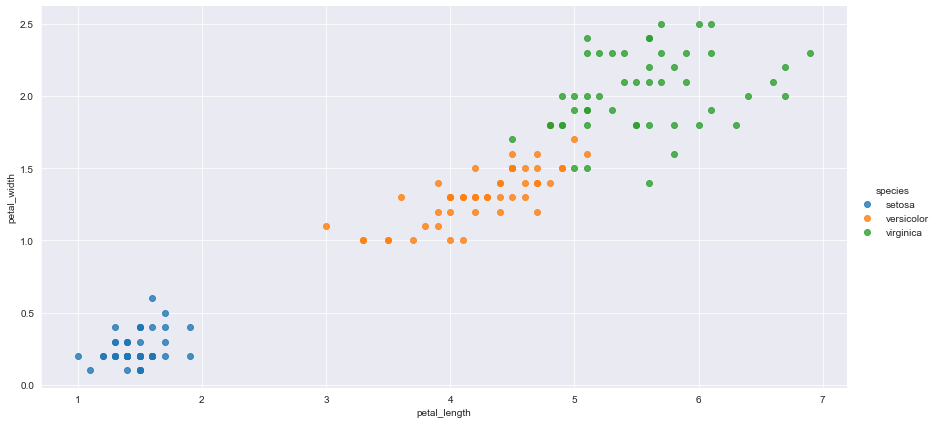

In [22]:
# Plots petal_length vs petal_width
g = sns.lmplot( x='petal_length', y='petal_width', data=iris, fit_reg=False, hue='species', legend=True, height=6, aspect=2)

plt.show()

Code for below Adapted from [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [23]:
# Code Adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn.cluster import KMeans

# Create Numpy Array using petal length and petal width
pl_pw = iris[['petal_length', 'petal_width']].to_numpy()

# Train k-Means model using above dataset, 3 clusters used as 3 species in data
kmeans = KMeans(n_clusters=3, random_state=0).fit(pl_pw)

# Returns labels attributed by
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
# Sample Prediction, selected at random
kmeans.predict([[4.7, 1.4]])

array([2])

In [25]:
# Prints Algorithm Centers of Cluster
kmeans.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [26]:
# Creates Dataframe with Centers of Clusters
pl_pw_center = pd.DataFrame(kmeans.cluster_centers_.T)

# Records original label references of Cluster Centres 
index_values = ['0', '1', '2'] 
   
# Aligns column names with dataframe to plot data and centers together 
column_values = ['petal_length', 'petal_width'] 
  
# creating the dataframe 
pl_pw_center = pd.DataFrame(data = kmeans.cluster_centers_,  
                  index = index_values,  
                  columns = column_values) 

# Aligns label name column for plotting
pl_pw_center['pl_pw Label'] = '0 Center', '1 Center', '2 Center'

# displaying the dataframe 
print(pl_pw_center) 

   petal_length  petal_width pl_pw Label
0      1.464000     0.244000    0 Center
1      5.595833     2.037500    1 Center
2      4.269231     1.342308    2 Center


After training model labels were taken from output of model an added to original dataset and then plotted, from the plot it looks like some of the rows were incorrectly classified. Using this data I will now to an analysis to determine how accurate the algorithm was at classifying each row.

Using the above labels and plot below I have determined that 0 = 'Setosa', 1 = 'Virginica' and 2 = 'Versicolor'. The accuracy was found to be **96%** for the algorithm based off of the dataset that was used to train the model.

In [27]:
# Function to Map K-Means Labels
def mappingFunction(row): 
    if int(row['pl_pw Label']) == 0:
        return 'setosa'
    
    elif int(row['pl_pw Label']) == 1:
        return 'virginica'
    
    else:
        return 'versicolor'
    
# Function to Calculate Score
def algorithmScore(row):
    if row['pl_pw Mapping'] == row['species']:
        return 1
    else:
        return 0    

In [28]:
# Add Labels to Dataset
iris['pl_pw Label'] = kmeans.labels_

# Map Labels to Species
iris['pl_pw Mapping'] = iris.apply(mappingFunction, axis=1)

# Create Score
iris['pl_pw Score'] = iris.apply(algorithmScore, axis=1)

In [29]:
# Calculate Score
score = sum(iris['pl_pw Score'])/len(iris['pl_pw Score'])

# Print Score
print(f'Algorithm Score: {score*100:.0f}%')

Algorithm Score: 96%


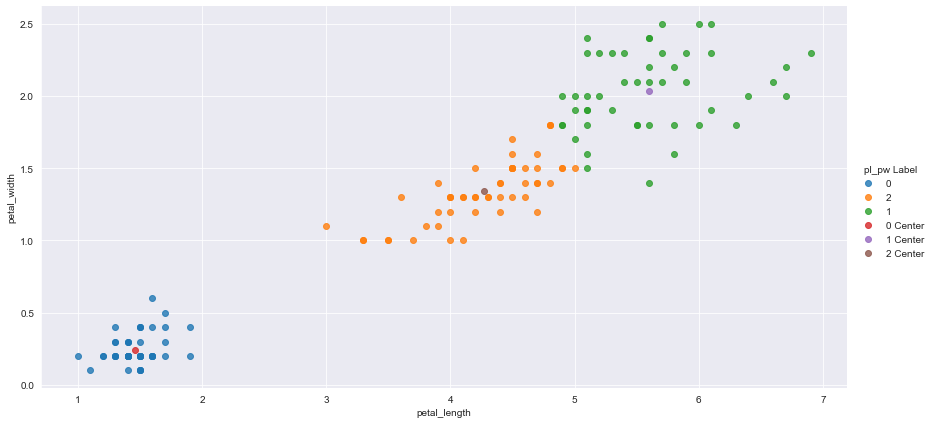

In [30]:
# Create dataset to contain data an Algorithm Centers
label_plot = iris[['petal_length', 'petal_width', 'pl_pw Label']]

# Appends centers to dataframe with data
label_plot = label_plot.append(pl_pw_center)

# Plots Dataframe with data and Centers
g = sns.lmplot( x='petal_length', y='petal_width', data=label_plot, fit_reg=False, hue='pl_pw Label', legend=True, height=6, aspect=2)

plt.show()

When the Kmeans clustering algorithm executes we tell the algorithm how many clusters to expect from our training dataset and from this the algorithm determines the centre point for the clusters and labels the points based on there location from each center.

We can see from the above graph in red, purple and brown the center of each cluster which gives some insight into what each point will be classified as. We can also see where the algorithm did not correctly classify based on our training set of know species at the point where the green and orange points meet and so some of the points were labeled incorrectly which led to an accuracy of 96%.

Now that I have trained the model based on the parameters that I believed would give the greatest ability for the algorithm to cluster by looking at the distribution beforehand my plan now is to try train another model using all of the parameters and not just a subset.

In [31]:
# Create dataframe from original Iris datset with all values except species
iris_all = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]

In [32]:
iris_all_train = iris_all[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [33]:
# Train k-Means model using above dataset, 3 clusters used as 3 species in data
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_all_train)

# Adds species to iris_all from original set
iris_all_train['species'] = iris_all['species']

# Returns labels attributed by
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [34]:
# Sample Prediction, selected at random
kmeans.predict([[4.7, 1.4, 3.6, 0.8]])

array([2])

In [35]:
# Prints Algorithm Centers of Cluster
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [36]:
# Creates Dataframe with Centers of Clusters
all_center = pd.DataFrame(kmeans.cluster_centers_)

# displaying centers 
print(all_center) 

          0         1         2         3
0  6.850000  3.073684  5.742105  2.071053
1  5.006000  3.418000  1.464000  0.244000
2  5.901613  2.748387  4.393548  1.433871


From taking a look at the new lables provided by the algorithm being trained on the complete iris dataset it looks like a 1 is a setosa, a 0 is a virginica and a 2 is a versicolor. Below I have updated my function to add the predicted species and will use this to determine the accuracy of the clustering.

In [37]:
# Function to Map K-Means Labels
def mappingFunction(row): 
    if int(row['all Label']) == 1:
        return 'setosa'
    
    elif int(row['all Label']) == 0:
        return 'virginica'
    
    else:
        return 'versicolor'
    
# Function to Calculate Score
def algorithmScore(row):
    if row['all Mapping'] == row['species']:
        return 1
    else:
        return 0    

In [38]:
# Add Labels to Dataset
iris_all['all Label'] = kmeans.labels_

# Map Labels to Species
iris_all['all Mapping'] = iris_all.apply(mappingFunction, axis=1)

# Create Score
iris_all['all Score'] = iris_all.apply(algorithmScore, axis=1)

<ipython-input-38-2076204be895>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_all['all Label'] = kmeans.labels_
<ipython-input-38-2076204be895>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_all['all Mapping'] = iris_all.apply(mappingFunction, axis=1)


In [39]:
iris_all

,sepal_length,sepal_width,petal_length,petal_width,species,all Label,all Mapping,all Score
0,5.1,3.5,1.4,0.2,setosa,1,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1,setosa,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2,versicolor,0
147,6.5,3.0,5.2,2.0,virginica,0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,0,virginica,1


In [40]:
# Calculate Score
score = sum(iris_all['all Score'])/len(iris_all['all Score'])

# Print Score
print(f'All Dataset Algorithm Score: {score*100:.0f}%')

All Dataset Algorithm Score: 89%


I was not sure what to expect from feeding in the entire dataset into the kmeans algorithm for classification and it looks like the algorithm was not quite as good as what my assumptions were as to what the most accurate parameters would be for training the model as my parameters had an accuracy of **96%** vs all parameters being **89%**.

I am going to assume that I picked the most accurate parameters to train the model but would not be surprise if on some sample dataset that the model trained on the entire dataset gave a more accurate preditiction.

In terms of using this model, a person in the field could select a species of the three sampled iris in my training model and complete a study on new samples to determine its accuracy. To do this the researcher would take the flowers and measure them as described in Fishers studies tabulating the data.

Once the researcher was back in the lab they can then use my trained model (using petal_length and petal_width) from earlier and request a prediction from my model by providing these same parameters of there samples. 

This would be passed into the code in this format: kmeans.predict([[petal_length, petal_width]]) which would be passed into the algorithm and would then determine what cluster center these points was closest to and label appropriately. Multiple samples could also be passed in and the labels returned give the algorithm predictions of an entire set of data at once.

## References
***
D'Aprano, S., 2011. INTEGER SQUARE ROOT FUNCTION (PYTHON RECIPE). [Online] 
Available at: https://code.activestate.com/recipes/577821-integer-square-root-function/
[Accessed 11 October 2020].

Glen, S., 2020. Chi-Square Statistic: How to Calculate It / Distribution. [Online] 
Available at: https://www.statisticshowto.com/probability-and-statistics/chi-square/
[Accessed 08 November 2020].

Hunneycutt, J., 2018. Running Chi-Square Tests with Die Roll Data in Python. [Online] 
Available at: https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b
[Accessed 08 November 2020].

Khan, S., 2012. Review and intuition why we divide by n-1 for the unbiased sample variance. [Online] 
Available at: https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance#:~:text=the...%E2%80%9D-,Yes.,value%20of%20the%20final%20one.
[Accessed 01 December 2020].

Laerd Statistics, 2018. Standard Deviation. [Online] 
Available at: https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php
[Accessed 27 November 2020].

Math is Fun, 2017. Standard Deviation and Variance. [Online] 
Available at: https://www.mathsisfun.com/data/standard-deviation.html
[Accessed 27 November 2020].

Math.com, n.d. Square Roots. [Online] 
Available at: http://www.math.com/school/subject1/lessons/S1U1L9DP.html
[Accessed 07 October 2020].

Nemiroff, R. & Bonnell , J., Unknown. The Square Root of Two to 1 Million Digits. [Online] 
Available at: https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil
[Accessed 11 October 2020].

perigon, 2017. Square root of a number without math.sqrt. [Online] 
Available at: https://stackoverflow.com/questions/45135238/square-root-of-a-number-without-math-sqrt
[Accessed 10 October 2020].

Python Software Foundation, 2020. 15. Floating Point Arithmetic: Issues and Limitations. [Online] 
Available at: https://docs.python.org/3/tutorial/floatingpoint.html
[Accessed 10 October 2020].

Python Software Foundation, 2020. Built-in Types. [Online] 
Available at: https://docs.python.org/3/library/stdtypes.html?highlight=as_integer_ratio#float.as_integer_ratio
[Accessed 11 October 2020].

Robᵩ, 2017. Fixed digits after decimal with f-strings. [Online] 
Available at: https://stackoverflow.com/questions/45310254/fixed-digits-after-decimal-with-f-strings
[Accessed 11 October 2020].

SYK, 2015. Python setting Decimal Place range without rounding?. [Online] 
Available at: https://stackoverflow.com/questions/29246455/python-setting-decimal-place-range-without-rounding
[Accessed 10 October 2020].

Taylor, C., 2020. Differences Between Population and Sample Standard Deviations. [Online] 
Available at: https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372#:~:text=The%20population%20standard%20deviation%20is,the%20individuals%20in%20a%20population.
[Accessed 27 November 2020].

Trani, R., 2016. ipython notebook align table to the left of cell. [Online] 
Available at: https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell
[Accessed 08 November 2020].

Wikipedia Contributors, 2020. Chi-squared test — Wikipedia, the free encyclopedia. [Online] 
Available at: https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096
[Accessed 08 November 2020].

Wikipedia, 2020. Integer square root. [Online] 
Available at: https://en.wikipedia.org/wiki/Integer_square_root
[Accessed 11 October 2020].